#Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

***Calculo del Voltaje en funcion del Tiempo***

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sympy as sp
import scipy as sc

In [ ]:
L = 0.98 #H
R = 0.142 #ohm
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04]) #tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24]) #corriente

data = {'Tiempo':t,'Corriente':i}
df = pd.DataFrame(data)
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


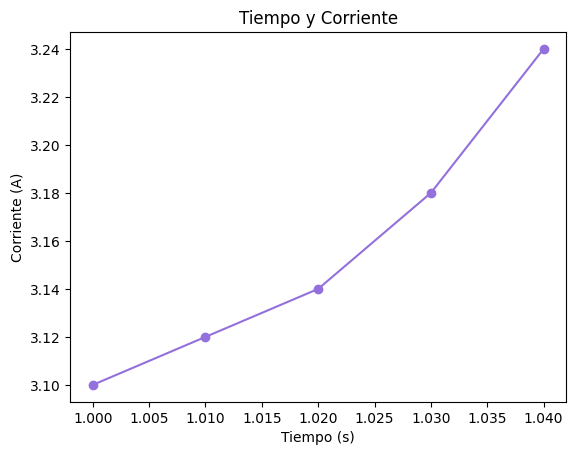

In [ ]:
plt.figure()
plt.title('Tiempo y Corriente')
plt.plot(df['Tiempo'],df['Corriente'],'-o',color='mediumpurple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.show()

In [ ]:
derivada = np.gradient(i,t)

di = np.diff(i)
dt = np.diff(t)
d = di/dt
d

array([2., 2., 4., 6.])

In [ ]:
#Calculo de la fem en funcion del tiempo
E_t = L*derivada + R*i
df['fem'] = E_t
df

,Tiempo,Corriente,fem
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


In [ ]:
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

***Interpolacion de los datos de Tiempo, Corriente y Fem con interpolacion de Lagrange y Cubic Spline***

In [ ]:
lag = lagrange(t,i)
xl = np.linspace(np.min(t),np.max(t))

def deriv(xl,lag,h):
  dlag = (1/2*h)*(-3*lag(xl)+4*lag(xl+h)-lag(xl+2*h))
  return dlag

derivate = deriv(xl,lag,h=1E-2)
derivate

array([1.99999988e-04, 1.75797487e-04, 1.54818133e-04, 1.36953127e-04,
       1.22093674e-04, 1.10130970e-04, 1.00956222e-04, 9.44606300e-05,
       9.05353934e-05, 8.90717180e-05, 8.99608052e-05, 9.30938514e-05,
       9.83620637e-05, 1.05656644e-04, 1.14868792e-04, 1.25889711e-04,
       1.38610600e-04, 1.52922664e-04, 1.68717105e-04, 1.85885122e-04,
       2.04317916e-04, 2.23906693e-04, 2.44542653e-04, 2.66116996e-04,
       2.88520927e-04, 3.11645644e-04, 3.35382354e-04, 3.59622254e-04,
       3.84256548e-04, 4.09176435e-04, 4.34273121e-04, 4.59437806e-04,
       4.84561692e-04, 5.09535980e-04, 5.34251873e-04, 5.58600571e-04,
       5.82473276e-04, 6.05761194e-04, 6.28355519e-04, 6.50147459e-04,
       6.71028215e-04, 6.90888988e-04, 7.09620978e-04, 7.27115389e-04,
       7.43263422e-04, 7.57956280e-04, 7.71085163e-04, 7.82541274e-04,
       7.92215815e-04, 7.99999987e-04])

Text(0.5, 1.0, 'Derivada de lagrange')

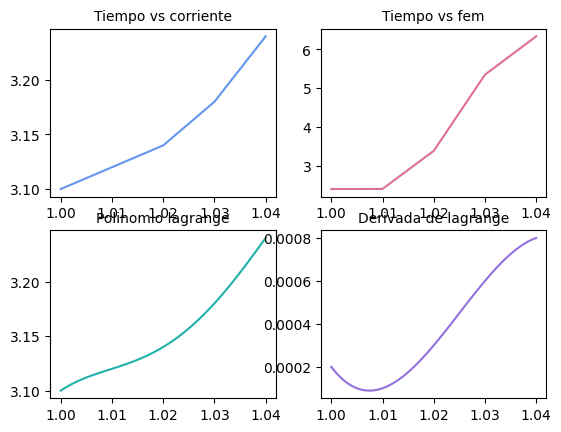

In [ ]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(df['Tiempo'],df['Corriente'],'-',color='cornflowerblue')
axs[0, 0].set_title('Tiempo vs corriente',fontsize=(10))
axs[0,1].plot(df['Tiempo'],df['fem'],'-',color='palevioletred')
axs[0, 1].set_title('Tiempo vs fem',fontsize=(10))
axs[1,0].plot(xl,lag(xl),'-',color='lightseagreen')
axs[1, 0].set_title('Polinomio lagrange',fontsize=(10))
axs[1,1].plot(xl,derivate,'-',color='mediumpurple')
axs[1, 1].set_title('Derivada de lagrange',fontsize=(10))


##**Parte 2**

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

***Calculo de una integral con la regla del trapecio:***

$$\int_{a}^{b} f(x)\,dx = \frac{h}{2}[f(a)+2\sum_{i=1}^{n-1} f(x_{i})+f(b)]$$

***Calculo de una integral con la regla de Simpson:***

$$\int_{a}^{b} f(x)\,dx = \frac{h}{3}[f(a)+2\sum_{j=1}^{n-1} f(x_{j})+4\sum_{j=2}^{n-2} f(x_{j})+f(b)]$$

***Integración***

In [ ]:
tanx = lambda z: 1/np.sqrt(np.tan(z))

a = 0.0001
b = np.pi/2
n = 1000
z = np.linspace(a,b,n)



def integ_trap(f,a,b,n,g):
  sum = 0
  for i in range(1,n-1):
    sum += f(g[i])
  h = (b-a)/n
  inte = (h/2)*(f(a)+f(b)+2*sum)
  return inte

print(f'Por la regla del trapecio la primera integral es: {integ_trap(tanx,a,b,n,z)}')

Por el metodo del trapecio la primera integral es: 2.23668040862512


In [ ]:
def integ_simp(f,a,b,n,g):
  h = (b-a)/(n)
  inte = (h/3)*(f(a) + 2*sum(f(g[1:n-2:2])) +4*sum(f(g[1:n-1:2])) +f(b))
  return inte

print(f'Por la regla de simpson la primera integral es: {integ_simp(tanx,a,b,n,z)}')

Por la regla de simpson la primera integral es: 2.2335252715875216


In [ ]:
d = 1
c = 1E20
nn = 1000000000000000000000
v = np.linspace(b,c,n)
cosx = lambda v: np.cos(v)/v**3

print(f'Por la regla de simpson la segunda integral es: {integ_simp(cosx,d,c,nn,v)}')

Por la regla de simpson la segunda integral es: 0.018010076862271324


Para la segunda integral tuve problemas al calcularla por el metodo del trapecio, así que solo hice uso del metodo de simpson. Adapte el numero de iteraciones para lograr un resultado aproximado al real.

***Integracion con libreria Sympy***

In [ ]:
from sympy import pi, oo, tan, symbols, integrate
x = symbols('x')

In [ ]:
#Primera integral
f = 1/(sp.sqrt(tan(x)))
I = integrate(f,(x,0,pi/2)).evalf()
print(f'El resultado de la primera integral es: {I}')

El resultado de la primera integral es: 2.22144146907918


In [ ]:
#Segunda integral
f = sp.cos(x)/x**3
I = integrate(f,(x,1,oo)).evalf()
print(f'El resultado de la segunda integral es: {I}')

El resultado de la segunda integral es: 0.0181176219806057


***Integral doble***

In [ ]:
from scipy.integrate import simps

In [ ]:
xn = np.linspace(0,np.pi/4,100)
yn = np.linspace(0,np.sin(x),100)

def fun(x,y):
  return 1/(np.sqrt(1-y**2))

zn = np.zeros((100,100))
for i, x in enumerate(xn):
    for j, y in enumerate(yn):
        zn[i, j] = fun(x, y)

Int2 = simps(simps(zn, yn), xn)

print(f'El resultado de la doble integral es: {Int2}')

El resultado de la doble integral es: 0.6168502836681052


## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto

***Calculo del periodo de un pendulo físico***

In [ ]:
i = 82.2E-4 #kg*m^2
g = 9.8 #m/s^2
m = 0.3 #kg
b = 0.2 #m
theta_0 = np.linspace(np.deg2rad(10),np.deg2rad(45),5) #grados
phi = np.linspace(0,np.pi/2,100) #grados


def integral(theta_0,phi):
  p_0 = 2*np.pi*np.sqrt((i)/(m*g*b))
  k = np.sin(theta_0/2)
  P_ = 1/np.sqrt(1-(k**2)*np.sin(phi)**2)
  return P_

I_ = np.zeros(len(theta_0))
for i, a in enumerate(theta_0):
  c = sc.integrate.trapezoid(integral(a,phi),phi)
  I_[i] = c

I_

array([1.57379213, 1.58137503, 1.59371562, 1.61101993, 1.63358631])

## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

# Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r
